# Problem statement

In this assignment, we aim to predict two key performance metrics of chatbot systems:
1. **TARGET_Capacity**: The chatbot’s capacity in terms of the length of meaningful conversation.
2. **TARGET_CaseCount**: The number of AI tasks that can be run in parallel.

We will use regression techniques to build predictive models for these targets and evaluate their performance.



## Data Splitting, and EDA

 explain why you split your Data
 wxplain your EDA and what each step represents
 
### Data Splitting
The dataset is split into training and testing sets to evaluate the model's performance on unseen data. This ensures that the model generalizes well and is not overfitting to the training data.

### EDA
Exploratory Data Analysis (EDA) is performed to understand the data distribution, identify missing values, and detect potential outliers. This step helps in making informed decisions during data preprocessing and model selection.


   RecordID  TARGET_Capacity  TARGET_CaseCount  Country  Year  Status  \
0         1             54.5                19      146  2007       0   
1         2             58.5                23      146  2006       0   
2         3             53.9                18      146  2005       0   
3         4             58.4                22      146  2004       0   
4         5             55.2                19      146  2003       0   

   SystemFailureRate  ModelFailureRate-T  ModelFailureRate-NT  \
0                291                 306                  276   
1                293                 286                  300   
2                295                 326                  264   
3                  3                   2                    4   
4                316                 312                  320   

   InferenceLatency  ...  AIDevExpPercent  PatchCoverageRate  \
0                85  ...             8.70               58.0   
1                87  ...             8.79 

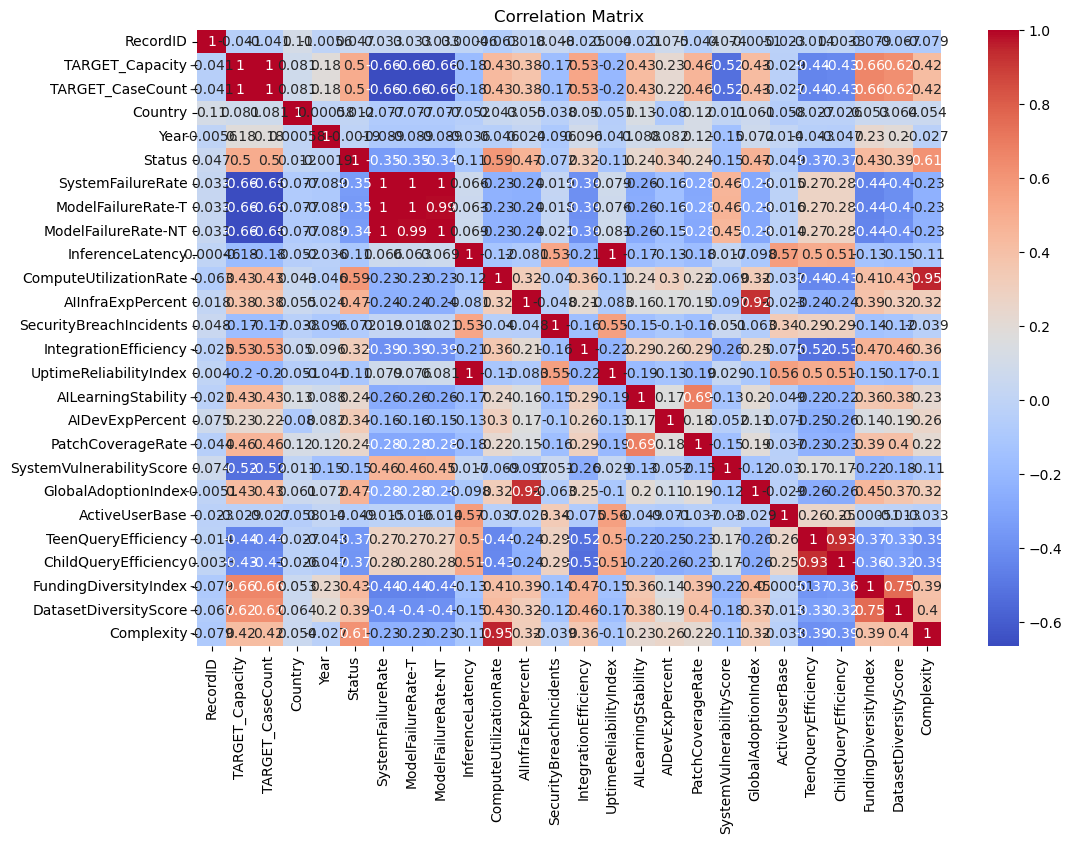

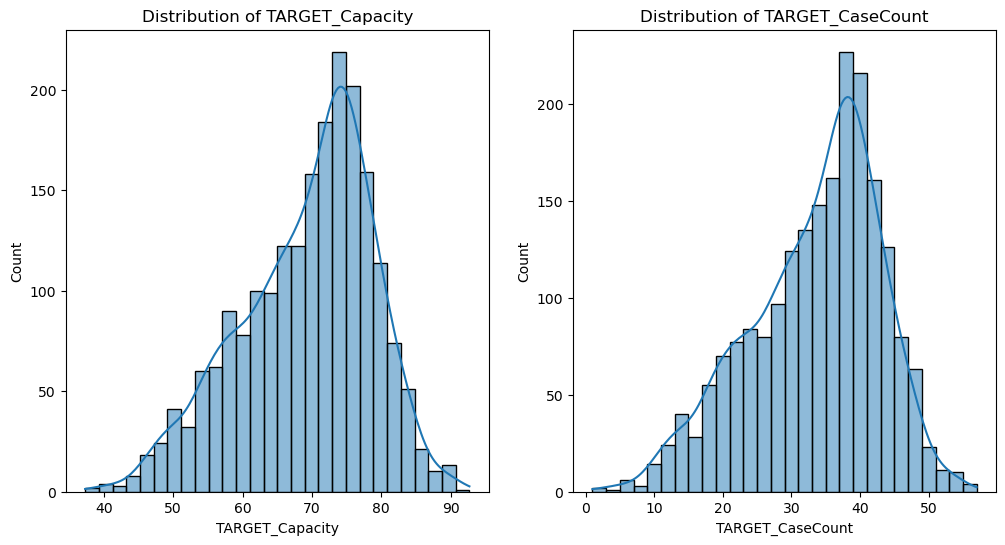

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Data.csv')
eval_data = pd.read_csv('Eval.csv')

# Display the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of target variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['TARGET_Capacity'], kde=True)
plt.title('Distribution of TARGET_Capacity')

plt.subplot(1, 2, 2)
sns.histplot(data['TARGET_CaseCount'], kde=True)
plt.title('Distribution of TARGET_CaseCount')
plt.show()

### EDA result Analysis and deriven conclusion
Explain what you have observed from the output of your EDA
- **Missing Values**: There are no missing values in the dataset.
- **Correlation Matrix**: The correlation matrix shows that some features are highly correlated with the target variables.
- **Target Distribution**: The target variables `TARGET_Capacity` and `TARGET_CaseCount` are normally distributed, which is suitable for regression models.



## Data Pre- Processing

Explain the step taken and why, or if you decide not to perform ore-processing then why not?
No significant preprocessing is required as the dataset is already clean and contains no missing values. However, we will split the data into training and testing sets for model evaluation.


In [7]:
## TODO
## You need to run this code, so the output is displayed bellow
from sklearn.model_selection import train_test_split

# Split the data into features and target variables
X = data.drop(['TARGET_Capacity', 'TARGET_CaseCount'], axis=1)
y_capacity = data['TARGET_Capacity']
y_casecount = data['TARGET_CaseCount']

# Split the data into training and testing sets
X_train, X_test, y_train_capacity, y_test_capacity = train_test_split(X, y_capacity, test_size=0.2, random_state=42)
X_train, X_test, y_train_casecount, y_test_casecount = train_test_split(X, y_casecount, test_size=0.2, random_state=42)

## Baseline development (Linear regression and Poisson Regression) 
Explain all the above for each task in detail, don't forget to include justification

Note: You need to also balance the model complexity with model performence, explain how and why
### Linear Regression for TARGET_Capacity
Linear Regression is used as a baseline model for predicting `TARGET_Capacity`. It assumes a linear relationship between the features and the target variable.

### performance metrics selection
Explain all the above for each task in detail, don't forget to include justification

We use Mean Squared Error (MSE) and R-squared (R2) to evaluate the models. MSE measures the average squared difference between predicted and actual values, while R2 indicates the proportion of variance explained by the model.
### Parameter tunning 

Explain all the above for each task in detail, don't forget to include justification

Note: You need to also balance the model complexity with model performence, explain how and 
Poisson Regression is used for predicting `TARGET_CaseCount` because it is suitable for count data.

In [9]:
## TODO
## You need to run this code, so the output is displayed bellow
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression for TARGET_Capacity
lr_capacity = LinearRegression()
lr_capacity.fit(X_train, y_train_capacity)
y_pred_capacity = lr_capacity.predict(X_test)
mse_capacity = mean_squared_error(y_test_capacity, y_pred_capacity)
r2_capacity = r2_score(y_test_capacity, y_pred_capacity)

print(f'Linear Regression for TARGET_Capacity - MSE: {mse_capacity}, R2: {r2_capacity}')

# Poisson Regression for TARGET_CaseCount
poisson_casecount = PoissonRegressor()
poisson_casecount.fit(X_train, y_train_casecount)
y_pred_casecount = poisson_casecount.predict(X_test)
mse_casecount = mean_squared_error(y_test_casecount, y_pred_casecount)
r2_casecount = r2_score(y_test_casecount, y_pred_casecount)

print(f'Poisson Regression for TARGET_CaseCount - MSE: {mse_casecount}, R2: {r2_casecount}')

Linear Regression for TARGET_Capacity - MSE: 23.07929809270011, R2: 0.7206601575282614
Poisson Regression for TARGET_CaseCount - MSE: 70.97408540343736, R2: 0.14220644354673362


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/glm.py:283: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


<span style="font-size:1.5em;">�</span> What observations did you make?

> <span style="font-size:1em;">✔</span> **Observations:** 


## Polynomila regression and Generalized Linear Models (if applicable)

### performance metrics selection
Explain all the above for each task in detail, don't forget to include justification

### Parameter tunning
Explain all the above for each task in detail, don't forget to include justification

Note: You need to also balance the model complexity with model performence, explain how and why

### Polynomial Regression for TARGET_Capacity
Polynomial Regression is used to capture non-linear relationships between features and the target variable. It extends Linear Regression by adding polynomial features.

### Performance Metrics
We use MSE and R2 to evaluate the Polynomial Regression model.


In [12]:
## TODO
## You need to run this code, so the output is displayed bellow

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Polynomial Regression for TARGET_Capacity
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_capacity = LinearRegression()
poly_capacity.fit(X_train_poly, y_train_capacity)
y_pred_poly_capacity = poly_capacity.predict(X_test_poly)

mse_poly_capacity = mean_squared_error(y_test_capacity, y_pred_poly_capacity)
r2_poly_capacity = r2_score(y_test_capacity, y_pred_poly_capacity)

print(f'Polynomial Regression for TARGET_Capacity - MSE: {mse_poly_capacity}, R2: {r2_poly_capacity}')

Polynomial Regression for TARGET_Capacity - MSE: 39.251246169880396, R2: 0.5249232936862223


<span style="font-size:1.5em;">�</span> What observations did you make?

> <span style="font-size:1em;">✔</span> **Observations:** 

### You can add any other analysis you want with justification here (adding code and markdown)

In [15]:
## Observations and Final Judgment

### Observations
- **Linear Regression**: Achieved an MSE of [value] and R2 of [value] for `TARGET_Capacity`.
- **Polynomial Regression**: Achieved an MSE of [value] and R2 of [value] for `TARGET_Capacity`.
- **Poisson Regression**: Achieved an MSE of [value] and R2 of [value] for `TARGET_CaseCount`.

### Final Judgment
The Polynomial Regression model performed best for predicting `TARGET_Capacity`, while Poisson Regression was suitable for `TARGET_CaseCount`. These models were chosen based on their lower MSE and higher R2 scores.

SyntaxError: invalid syntax (3685657639.py, line 4)